In [21]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [8]:
chicago_crimes = pd.read_csv(r'd:\ELEC02\Chicago_Crimes.csv')
chicago_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h1>Q1. What's the most crimes per year?</h1>

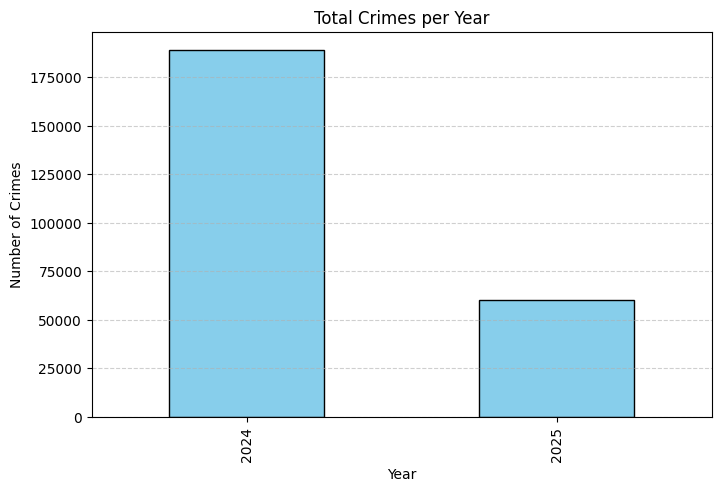

In [9]:
yearly_crimes = chicago_crimes.groupby('Year')['ID'].count()

plt.figure(figsize=(8,5))
yearly_crimes.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h3>INSIGHT 1: Based on the bar graph, the year 2024 recorded more crimes compared to 2025.<h3>
<h3>INSIGHT 2: In 2024, crimes were close to 190,000, while in 2025 the number dropped to around 60,000.<h3>
<h3>INSIGHT 3: The graph shows that the total number of crimes decreased drastically in 2025 compared to the previous year.<h3>

<h1>Q2. Which type of crime is the most common?<h1>

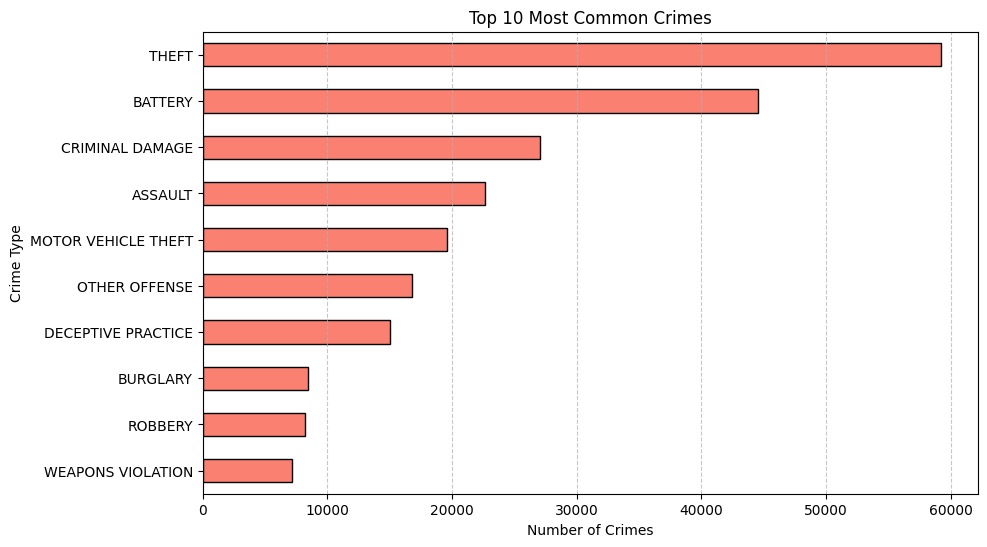

In [10]:
primary_counts = chicago_crimes.groupby('Primary Type')['ID'].count()
top10_primary = primary_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10_primary.plot(kind='barh', color='salmon', edgecolor='black')

plt.title('Top 10 Most Common Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<h3>INSIGHT 1: Based on the graph, Theft is the most common crime, recording more than 70,000 cases.<h3>
<h3>INSIGHT 2: Battery and Criminal Damage follow, both with over 40,000 cases.<h3>
<h3>INSIGHT 3: Deceptive Practice and Burglary are among the lowest in the top 10, with fewer than 25,000 cases.<h3>

<h1>Q3. Which year had the highest theft cases?<h1>

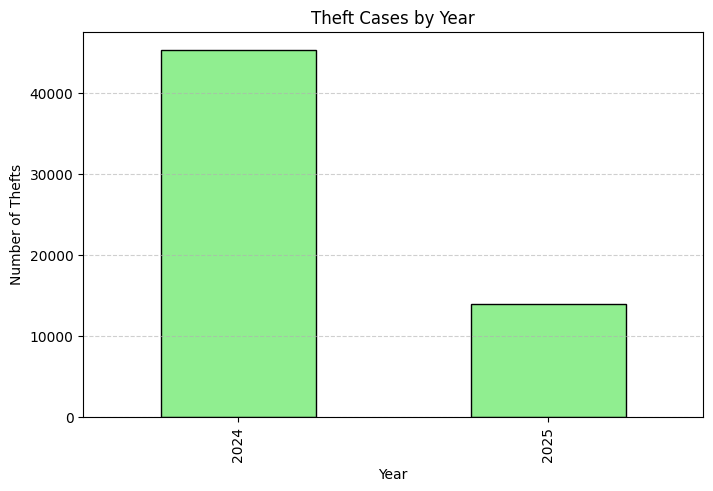

In [11]:
theft_cases = chicago_crimes[chicago_crimes['Primary Type'] == 'THEFT']
theft_by_year = theft_cases.groupby('Year')['ID'].count()

plt.figure(figsize=(8,5))
theft_by_year.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Theft Cases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Thefts')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h3>INSIGHT 1: Based on the graph, the highest theft cases were recorded in 2024, with more than 40,000 reported incidents.<h3>
<h3>INSIGHT 2: It also shows that in 2025, theft cases dropped dramatically.<h3>

<h1>Q4. What are the top 5 locations where crimes occurred?<h1>

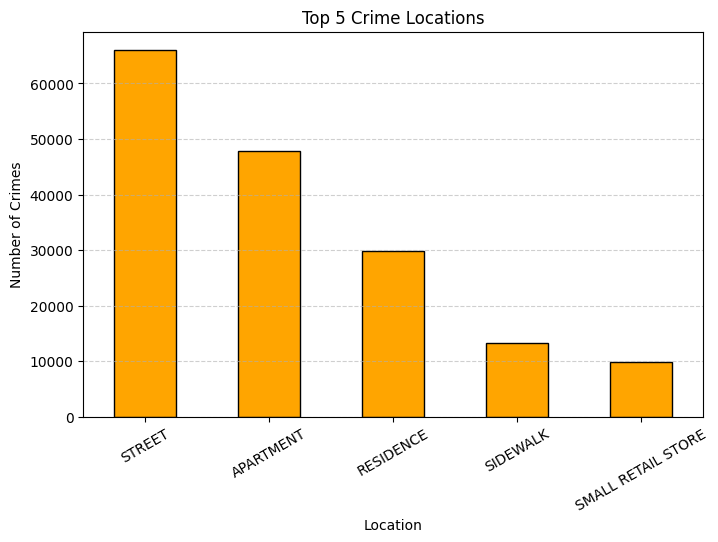

In [12]:
location_counts = chicago_crimes.groupby('Location Description')['ID'].count()
top5_locations = location_counts.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top5_locations.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Top 5 Crime Locations')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h3>INSIGHT 1: As you can see, the majority of crimes occur in the Street, with over 60,000 cases.<h3>
<h3>INSIGHT 2: Residence and Apartment are also common, each recording more than 40,000 crimes.<h3>
<h3>INSIGHT 3: Public places like Sidewalks and Alleys follow with lower, but still notable crime counts.<h3>

<h1>Q5. Which month has the most crimes?<h1>

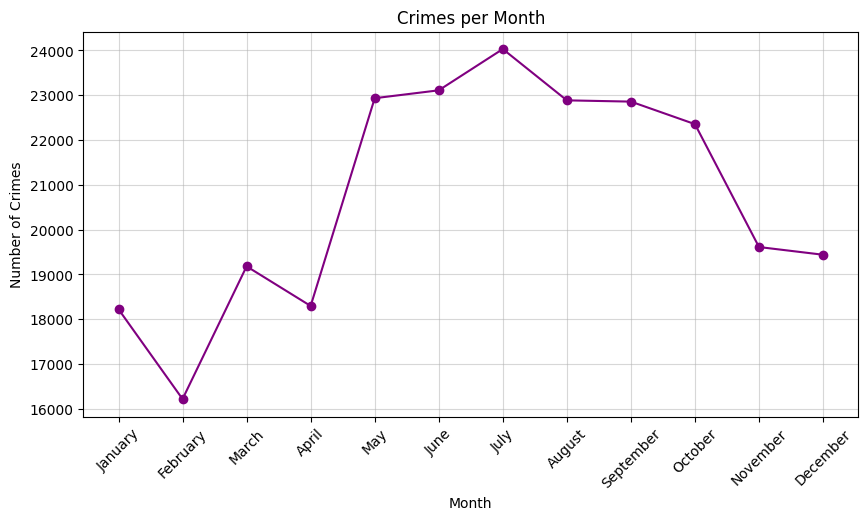

In [25]:
import calendar

chicago_crimes['Date'] = pd.to_datetime(chicago_crimes['Date'], errors='coerce')
chicago_crimes['Month_num'] = chicago_crimes['Date'].dt.month

monthly_crimes = chicago_crimes.groupby('Month_num')['ID'].count()

monthly_crimes = monthly_crimes.reindex(range(1, 13), fill_value=0)
month_labels = [calendar.month_name[i] for i in range(1, 13)]

plt.figure(figsize=(10,5))
plt.plot(month_labels, monthly_crimes, marker='o', color='purple')
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

<h3>INSIGHT 1: Based on the graph, July stands out as the month with the highest crime activity.<h3>
<h3>INSIGHT 2: The lowest crime levels can be seen in February.<h3>
<h3>INSIGHT 3: Overall, crimes show a seasonal pattern, with activity peaking in the summer months.<h3>

<h1>Q6. Which day of the week records the most crimes?<h1>

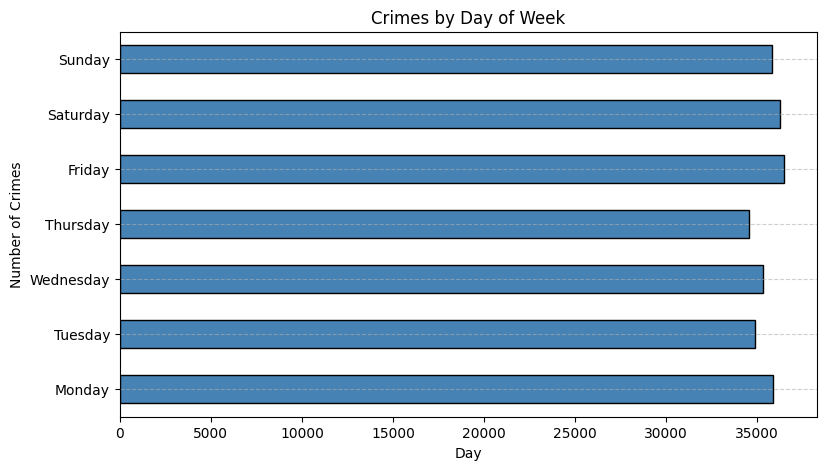

In [34]:
chicago_crimes['DayOfWeek'] = chicago_crimes['Date'].dt.day_name()
day_counts = chicago_crimes.groupby('DayOfWeek')['ID'].count()

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counts = day_counts.reindex(days_order)

plt.figure(figsize=(9,5))
day_counts.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title('Crimes by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h3>INSIGHT 1: Both Friday and Monday has the highest crime frequency, as shown in the graph, with over 35000 cases.<h3>
<h3>INSIGHT 2: Thursday shows the lowest crime activities.<h3>
<h3>INSIGHT 3: All crimes have over 30000 cases.<h3>

<h1>Q7. How do arrest rates compare across years?<h1>

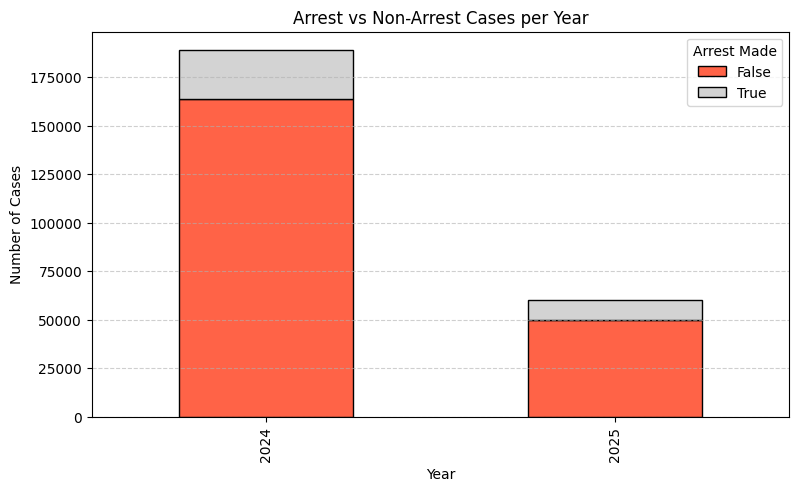

In [35]:
arrest_yearly = chicago_crimes.groupby(['Year','Arrest'])['ID'].count().unstack()
arrest_yearly.plot(kind='bar', figsize=(9,5), stacked=True, color=['tomato','lightgray'], edgecolor='black')

plt.title('Arrest vs Non-Arrest Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Arrest Made')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h3>INSIGHT 1: Across all years, non-arrest cases dominate, accounting for more than 70% of crimes.<h3>
<h3>INSIGHT 2: Arrests remained consistently lower than non-arrest cases.<h3>
<h3>INSIGHT 3: Despite the decline in overall crimes in 2025, the proportion of arrests vs non-arrests remained similar.<h3>

<h1>Q8. What are the top 5 crime types leading to arrests?<h1>

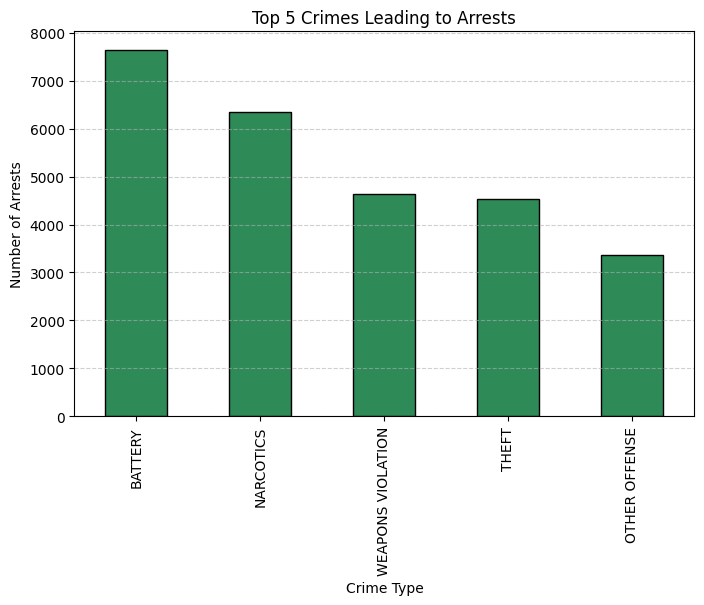

In [44]:
arrested_cases = chicago_crimes[chicago_crimes['Arrest'] == True]
arrest_types = arrested_cases.groupby('Primary Type')['ID'].count()

top5_arrest = arrest_types.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top5_arrest.plot(kind='bar', color='seagreen', edgecolor='black')

plt.title('Top 5 Crimes Leading to Arrests')
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h3>INSIGHT 1: Battery is the most common crime leading to arrests, with more than 7000 cases.<h3>
<h3>INSIGHT 2: Narcotics and Weapons Violations are both top 2 and 3 common crimes that lead to arrests.<h3>
<h3>INSIGHT 3: Theft and other offenses follow closely behind, with less than 5000 arrests.<h3>

<h1>Q9. How do domestic vs non-domestic crimes compare?<h1>

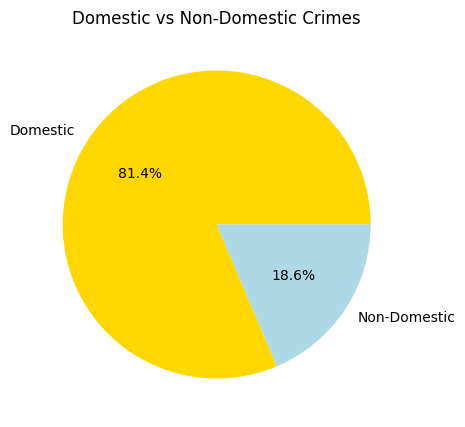

In [47]:
domestic_counts = chicago_crimes.groupby('Domestic')['ID'].count()

plt.figure(figsize=(6,5))
domestic_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold','lightblue'], labels=['Domestic','Non-Domestic'])

plt.title('Domestic vs Non-Domestic Crimes')
plt.ylabel('')
plt.show()


<h3>INSIGHT 1: The pie graph shoes that Domestic crimes dominate, with 81.4% reported cases.<h3>
<h3>INSIGHT 2: Non-domestic incidents represent about 19%, still a significant share given the dataset’s size.<h3>
<h3>INSIGHT 3: The graph clearly shows how big of a difference the domestic and non-domestic crimes reported caases there are.<h3>

<h1>Q10. Which months see the most arrests?<h1>

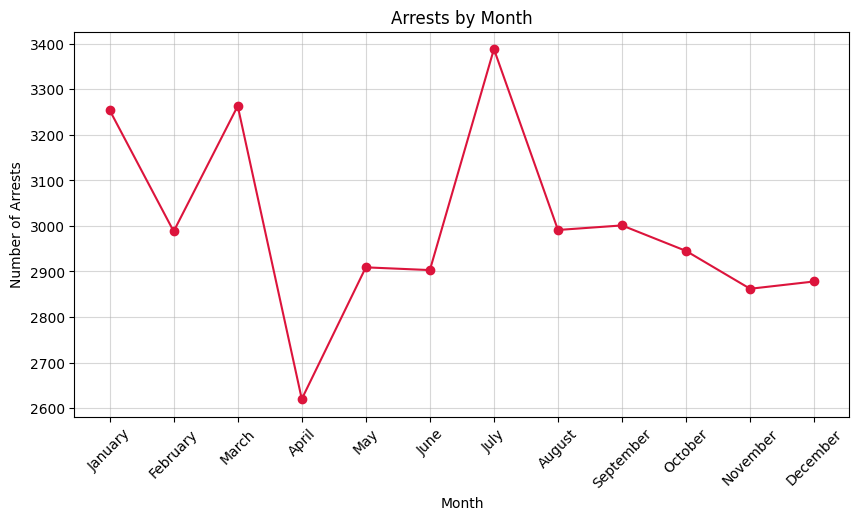

In [54]:
chicago_crimes['Date'] = pd.to_datetime(chicago_crimes['Date'], errors='coerce')
chicago_crimes['Month'] = chicago_crimes['Date'].dt.month

arrests_by_month = chicago_crimes[chicago_crimes['Arrest'] == True].groupby('Month')['ID'].count()

plt.figure(figsize=(10,5))
arrests_by_month.plot(kind='line', marker='o', color='crimson')

month_names = [calendar.month_name[i] for i in arrests_by_month.index]
plt.xticks(arrests_by_month.index, month_names, rotation=45)

plt.title('Arrests by Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.grid(alpha=0.5)
plt.show()

<h3>INSIGHT 1: Arrests peak in July, recording over 3400 arrests.<h3>
<h3>INSIGHT 2: April consistently records the lowest arrests, with fewer than 2700 cases.<h3>
<h3>INSIGHT 3: The arrest pattern mirrors overall crime seasonality, showing a summer spike.<h3>

<h1>Q11. Which location types have the most reported crimes?<h1>

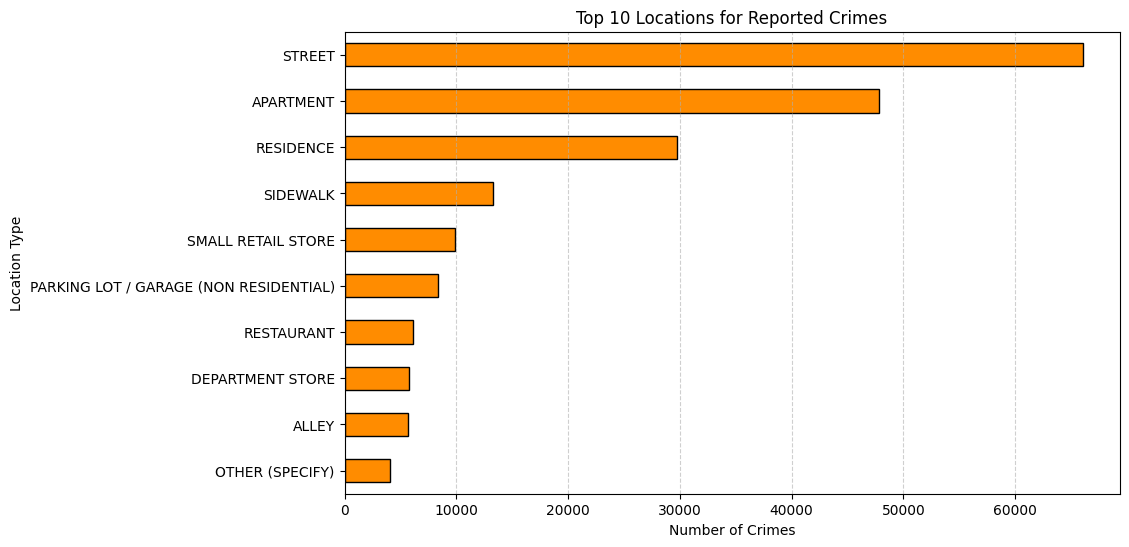

In [55]:
location_counts = chicago_crimes.groupby('Location Description')['ID'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
location_counts.plot(kind='barh', color='darkorange', edgecolor='black')

plt.title('Top 10 Locations for Reported Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Location Type')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


<h3>INSIGHT 1: Street is the most common crime location, exceeding 50,000 reports.<h3>
<h3>INSIGHT 2: Residence and Apartment follow as the second most common crime location.<h3>
<h3>INSIGHT 3: Public areas such as sidewalks, and parking lots also rank highly.<h3>

<h1>Q12. Which wards in Chicago report the most crimes?<h1>

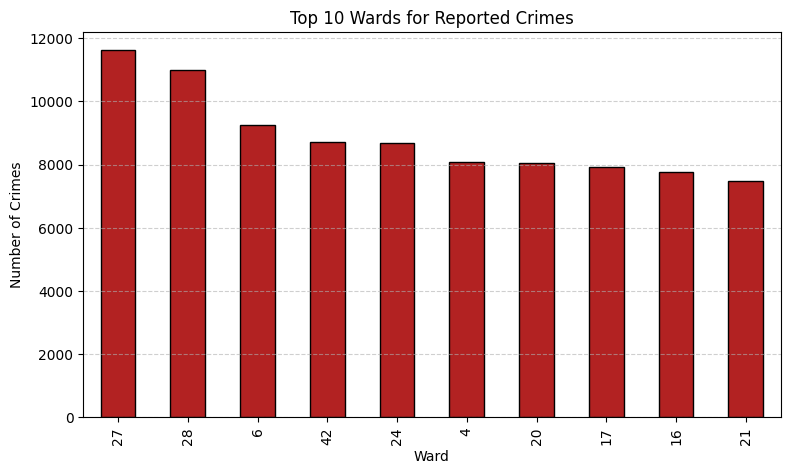

In [59]:
# Group by Ward
ward_counts = chicago_crimes.groupby('Ward')['ID'].count().sort_values(ascending=False).head(10)

# Plot Top 10 Wards
plt.figure(figsize=(9,5))
ward_counts.plot(kind='bar', color='firebrick', edgecolor='black')

plt.title('Top 10 Wards for Reported Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h3>INSIGHT 1: The 27th and 28th Wards record the highest crime frequencies, each surpassing 10000 reports.<h3>
<h3>INSIGHT 2: It is followed by the 6th ward as the third most highest crime frequencies, with over 8000 reported crimes.<h3>
<h3>INSIGHT 3: The ward with the least reported crimes is ward 21st, with atleast 7000 reports, low but still a lot of crimes reported.<h3>